# Jupyter-NoteBook IndPenSim Import and Plot

## IndPenSim Data import 

Download data and unzip contents to current folder

### IndPenSim Data websites 
Addition details can be found at:<a href='http://www.industrialpenicillinsimulation.com/'> www.industrialpenicillinsimulation.com</a>
Data is downloaded from : <a href='https://data.mendeley.com/datasets/pdnjz7zz5x/1'> Mendeley data Website</a>

In [1]:
## Import necessary packages
import os
from urllib.request import urlretrieve 
import zipfile
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests

In [2]:
## Downloadinhg zip folder containing data from Mndely data website
# print('Patience this is downloading over 0.5 GB of data so might take some time depending on internet connection...')
# indpensim_data_link = 'https://data.mendeley.com//datasets/pdnjz7zz5x//1//files//ec0dfb55-7e3c-4124-8b0c-ca8ae7c50fe7//100_Batches_IndPenSim.zip'
# download the url contents in binary format
# r = requests.get(indpensim_data_link)
 
# open method to open a file on your system and write the contents
# with open("100_batches.zip", "wb") as code:
#     code.write(r.content)

## Unzip IndPenSim Data

In [3]:
## Unzipping data from folders 
# with zipfile.ZipFile("100_batches.zip","r") as zip_ref:
#     zip_ref.extractall()

# Converting batch and Ramna data into Dataframe
import pandas as pd
data = pd.read_csv('Mendeley_data/100_Batches_IndPenSim_V3.csv') 
# Converting summary statisic data into Dataframe
data_summary = pd.read_csv('Mendeley_data/100_Batches_IndPenSim_Statistics.csv')

## Data Summary

In [4]:
# Summary of Summary data
data_summary.head(10)

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0
5,6,1005700.0,1383100.0,2388700.0,0
6,7,1147600.0,2307000.0,3454600.0,0
7,8,1201200.0,2676200.0,3877400.0,0
8,9,1757800.0,2325300.0,4083100.0,0
9,10,878430.0,1103600.0,1982000.0,0


In [5]:
# Summary of Dataframe for raw data
data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN



## Data Processing
### Split data into spectral and process data
Splitting the data into process measurement data and Raman spectroscopy data

In [6]:
# Split the dataframe into two parts at column "2400"
# The first part contains process variables, the second part contains Raman spectra
variable_raman_data = np.split(data, [data.columns.get_loc("2400")], axis=1)

c:\Users\lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
# Extract the process variables dataframe (first part of the split)
variable_data = variable_raman_data[0]
# Fix a column naming issue by swapping two column names
# This appears to correct a mislabeling in the original dataset
variable_data = variable_data.rename(columns={
    '2-PAT control(PAT_ref:PAT ref)': 'Batch reference(Batch_ref:Batch ref)',
    'Batch reference(Batch_ref:Batch ref)':'2-PAT control(PAT_ref:PAT ref)'})
variable_data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0000,30.1180,9.8335,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0000,51.2210,18.1550,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0000,54.3020,9.5982,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.8,30.0,100.0,8.0,0.0000,37.8160,4.3395,0.00010,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.00010,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65.0,100.0,80.0,0.0000,12.9000,33.5860,5.93590,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,43854.0,44034.0
113931,229.4,65.0,100.0,80.0,0.0000,10.0470,10.0760,98.83400,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44814.0,44659.0
113932,229.6,65.0,100.0,80.0,0.0000,7.3609,69.3450,9.88340,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44273.0,43952.0
113933,229.8,65.0,100.0,80.0,0.0000,6.2794,38.6100,0.98834,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,100.0,100.0,1.0,44733.0,45245.0


In [8]:
variable_data.to_csv('100_Batches_IndPenSim_V3_variable_data.csv', index=False)

In [9]:
# Extract the Raman spectroscopy data (second part of the split)
raman_spectra = variable_raman_data[1]
# Create a dataframe containing only the batch reference column
# This will be used to identify which batch each spectrum belongs to
batch_ref_df = variable_data[['Batch reference(Batch_ref:Batch ref)']]
# Combine batch references with Raman spectra to maintain batch identification
# This ensures we can track which spectrum belongs to which batch
raman_spectra_batch_id = pd.concat([batch_ref_df, raman_spectra], axis=1)
raman_spectra_batch_id

,Batch reference(Batch_ref:Batch ref),2400,2399,2398,2397,2396,2395,2394,2393,2392,...,210,209,208,207,206,205,204,203,202,201
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,100.0,43947.0,44177.0,44599.0,44901.0,44809.0,44536.0,44399.0,44434.0,44362.0,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,100.0,44406.0,44350.0,44503.0,44496.0,44345.0,44128.0,44182.0,44366.0,44464.0,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,100.0,43965.0,44024.0,43906.0,43864.0,43765.0,43621.0,43670.0,43825.0,43875.0,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,100.0,45625.0,45769.0,45810.0,45687.0,45455.0,45180.0,45011.0,44968.0,45024.0,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [10]:
raman_spectra_batch_id.to_csv('100_Batches_IndPenSim_V3_raman_spectra_data.csv', index=False)

In [11]:
# Check the dimensions of the process variables dataframe (rows, columns)
variable_data.shape

(113935, 39)

In [12]:
# Display the first 3 rows of the process variables dataframe
variable_data.head(3)

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0,30.118,9.8335,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0,51.221,18.1550,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0,54.302,9.5982,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [13]:

# Display statistical summary of the process variables again after renaming
variable_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616,89402.127915
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082,47852.683115
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000,47029.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000,89772.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000,129570.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000,195340.000000


In [14]:
variable_list = variable_data.columns

In [15]:
variable_list

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

In [16]:
## Variable data plot

In [17]:
import ipywidgets as widgets
 

variable_plot_selection = widgets.Dropdown(options=variable_list, value = 'Penicillin concentration(P:g/L)')
variable_plot_selection


Dropdown(index=13, options=('Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:…

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

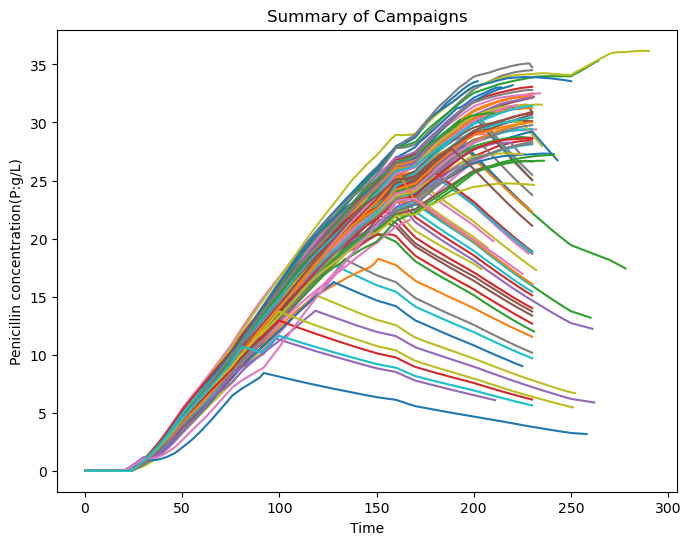

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
bp = variable_data.groupby('Batch reference(Batch_ref:Batch ref)').plot(x = 'Time (h)', y = variable_plot_selection.value, ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time')
ax.set_ylabel(variable_plot_selection.value)



## Raman Data plot 


In [19]:
raman_data = variable_data.groupby('Batch reference(Batch_ref:Batch ref)').get_group(1)

In [20]:
raman_data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,Batch reference(Batch_ref:Batch ref),2-PAT control(PAT_ref:PAT ref),Batch ID,Fault flag
0,0.2,30.0,100.0,8.0,0.0000,30.118,9.8335,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.4,30.0,100.0,8.0,0.0000,51.221,18.1550,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.6,30.0,100.0,8.0,0.0000,54.302,9.5982,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.8,30.0,100.0,8.0,0.0000,37.816,4.3395,0.0001,0.0,0.6,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,30.0,100.0,8.0,0.5181,18.908,1.1045,0.0001,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,225.2,65.0,100.0,80.0,0.0000,139.360,18.4560,80.4970,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,161050.0,161770.0
1126,225.4,65.0,100.0,80.0,0.0000,154.080,51.1230,8.0497,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,160540.0,161100.0
1127,225.6,65.0,100.0,80.0,0.0000,170.490,15.3370,127.2700,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,160520.0,160750.0
1128,225.8,65.0,100.0,80.0,0.0000,186.170,86.8890,12.7270,250.0,0.9,...,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,161500.0,162220.0


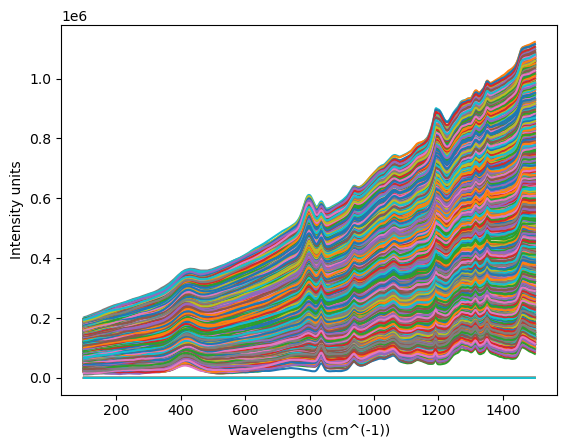

In [21]:
Intensity = raman_spectra.iloc[100:1208, 100:1500]
x_wave = raman_spectra.index[100:1500]
Temp = Intensity.transpose()
import matplotlib.pyplot as plt
plt.plot(x_wave,Temp)
plt.ylabel('Intensity units')
plt.xlabel('Wavelengths (cm^(-1))')
plt
plt.show()